In [17]:
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

### Load dataset

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Normalize pixel values to be between [0,1]

In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0

### Split training into training and validation set

In [5]:
# Define the split index
split_index = int(0.8 * len(train_images))  # 80% of 60000 = 48000

# Split images and labels
train_images, val_images = train_images[:split_index], train_images[split_index:]
train_labels, val_labels = train_labels[:split_index], train_labels[split_index:]

### Verify data

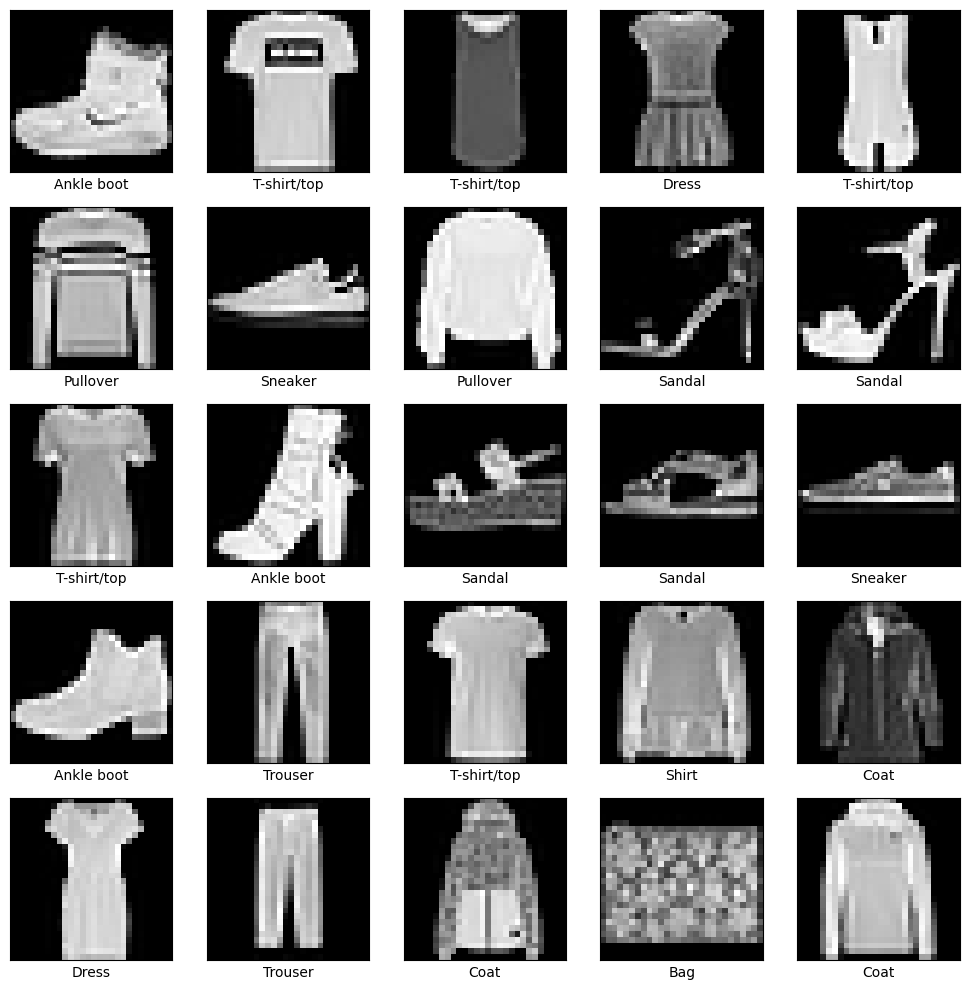

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')  # grayscale colormap
    plt.xlabel(class_names[train_labels[i]])  # no [0] needed
plt.tight_layout()
plt.show()

### Convolutional base

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

### Model Arch

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

### Add Dense Layers

In [26]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,676 (369.83 KB)

 Trainable params: 94,676 (369.83 KB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(val_images, val_labels))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.6856 - loss: 0.8440 - val_accuracy: 0.8462 - val_loss: 0.4070
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8543 - loss: 0.3893 - val_accuracy: 0.8739 - val_loss: 0.3402
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8857 - loss: 0.3086 - val_accuracy: 0.8894 - val_loss: 0.2948
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8986 - loss: 0.2687 - val_accuracy: 0.8996 - val_loss: 0.2722
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9117 - loss: 0.2387 - val_accuracy: 0.8992 - val_loss: 0.2722
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9184 - loss: 0.2178 - val_accuracy: 0.9001 - val_loss: 0.2721
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9260 - loss: 0.1983 - val_accuracy: 0.9013 - val_loss: 0.2632
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9317 -

### Evaluate the model

313/313 - 2s - 5ms/step - accuracy: 0.9027 - loss: 0.2925


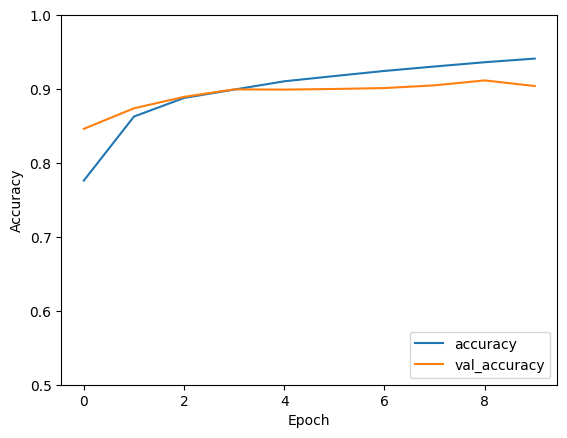

In [28]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [29]:
print(test_acc)

0.9027000069618225


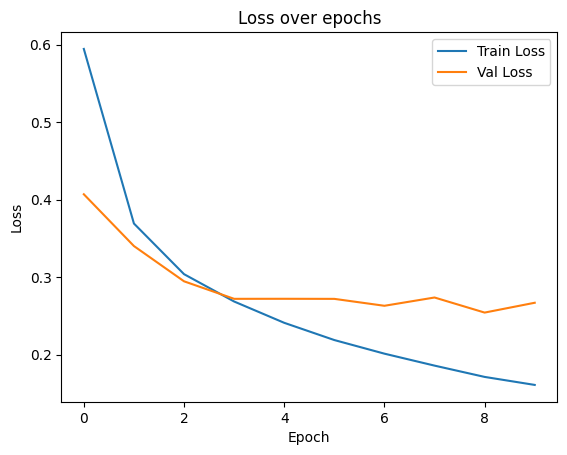

In [32]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

### Model 2 - Batch Normalization

In [9]:
# CNN with Batch normalization
model2 = models.Sequential([
    # First Conv Block
    layers.Conv2D(64, (5, 5), padding='same', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Second Conv Block
    layers.Conv2D(128, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Third Conv Block
    layers.Conv2D(128, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# compile model 
model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# train model2
history = model2.fit(
    train_images, train_labels,
    epochs=20,
    validation_data=(val_images, val_labels),
    callbacks=[early_stop]
)



Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 88s 57ms/step - accuracy: 0.7894 - loss: 0.6101 - val_accuracy: 0.8752 - val_loss: 0.3465
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.8872 - loss: 0.3184 - val_accuracy: 0.8905 - val_loss: 0.2956
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.9012 - loss: 0.2751 - val_accuracy: 0.8836 - val_loss: 0.3147
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.9093 - loss: 0.2451 - val_accuracy: 0.9124 - val_loss: 0.2385
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 53ms/step - accuracy: 0.9205 - loss: 0.2182 - val_accuracy: 0.9172 - val_loss: 0.2371
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 53ms/step - accuracy: 0.9291 - loss: 0.1921 - val_accuracy: 0.9191 - val_loss: 0.2284
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 92s 59ms/step - accuracy: 0.9370 - loss: 0.1757 - val_accuracy: 0.9169 - val_loss: 0.2296
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 142s 59ms/step - accuracy: 0.9417 

313/313 - 4s - 14ms/step - accuracy: 0.9210 - loss: 0.2286


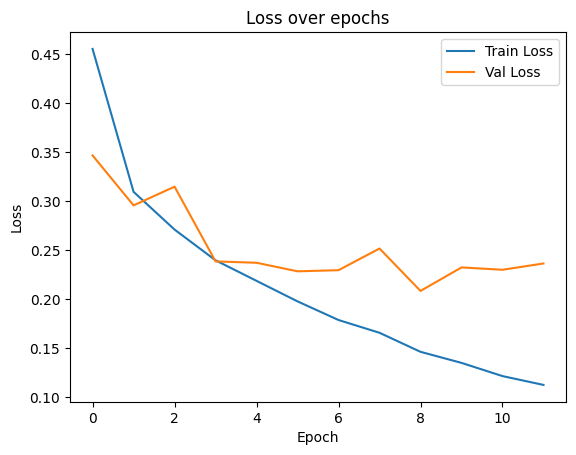

In [12]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

test_loss, test_acc2 = model2.evaluate(test_images,  test_labels, verbose=2)

In [13]:
print(test_acc2)

0.9210000038146973


### Model 3 - Global Average Pooling

In [14]:
model3 = models.Sequential([
    # Conv Block 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    # Conv Block 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    # Conv Block 3
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),

    # Use Global Average Pooling instead of Flatten
    layers.GlobalAveragePooling2D(),

    # Dense layers
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model3.fit(
    train_images, train_labels,
    epochs=15,
    validation_data=(val_images, val_labels),
    callbacks=[early_stop]
)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7507 - loss: 0.7125 - val_accuracy: 0.8353 - val_loss: 0.4502
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.8827 - loss: 0.3244 - val_accuracy: 0.8963 - val_loss: 0.2852
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9025 - loss: 0.2727 - val_accuracy: 0.8934 - val_loss: 0.2815
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9072 - loss: 0.2569 - val_accuracy: 0.9025 - val_loss: 0.2568
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - accuracy: 0.9184 - loss: 0.2296 - val_accuracy: 0.9169 - val_loss: 0.2291
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.9240 - loss: 0.2099 - val_accuracy: 0.9083 - val_loss: 0.2505
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9274 - loss: 0.2002 - val_accuracy: 0.9010 - val_loss: 0.2553
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9350 -

313/313 - 2s - 7ms/step - accuracy: 0.9082 - loss: 0.2474


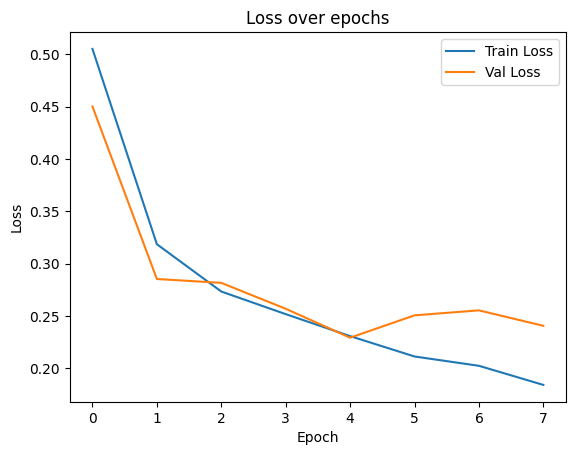

In [15]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

test_loss, test_acc3 = model3.evaluate(test_images,  test_labels, verbose=2)

In [16]:
print(test_acc3)

0.9082000255584717


### Different Optimizer: RMSprop

In [19]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))

model4.add(layers.Flatten())
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(10))

model4.compile(optimizer=RMSprop(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model4.fit(
            train_images, train_labels, 
            epochs=10, 
            validation_data=(val_images, val_labels),
            callbacks=[early_stop]
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7232 - loss: 0.7459 - val_accuracy: 0.8687 - val_loss: 0.3626
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8766 - loss: 0.3397 - val_accuracy: 0.8930 - val_loss: 0.2971
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8950 - loss: 0.2836 - val_accuracy: 0.8959 - val_loss: 0.2859
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9099 - loss: 0.2497 - val_accuracy: 0.8993 - val_loss: 0.2896
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9167 - loss: 0.2315 - val_accuracy: 0.8984 - val_loss: 0.2842
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9250 - loss: 0.2064 - val_accuracy: 0.9057 - val_loss: 0.2820
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9294 - loss: 0.1926 - val_accuracy: 0.9082 - val_loss: 0.2973
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9339 - los

313/313 - 1s - 4ms/step - accuracy: 0.9017 - loss: 0.3033


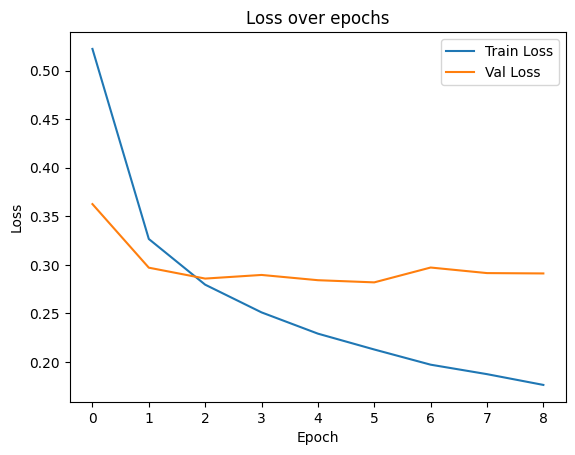

In [21]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

test_loss, test_acc4 = model4.evaluate(test_images,  test_labels, verbose=2)

In [22]:
print(test_acc4)

0.9017000198364258
